In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV,cross_val_predict

from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,f1_score,precision_recall_curve,roc_curve,roc_auc_score
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml
import cv2

# Preparation des données

## Telechargement des données

In [3]:
dataDict=fetch_openml('mnist_784', version=1)

print("Affichage des cles du dictionnaire : ")
for cle in dataDict.keys():
    print(cle)

Affichage des cles du dictionnaire : 
data
target
frame
categories
feature_names
target_names
DESCR
details
url


## Informations sur les données

In [4]:
print("Il y a {} features pour {} échantillons".format(dataDict["data"].shape[1],dataDict["data"].shape[0]))
X=dataDict['data']
print("Il y a {} targets".format(np.unique(dataDict['target']).size))
y=dataDict['target']

print("Les differentes valeurs sont : {}".format(np.unique(y)))
print("Description détaillée de la base de donnée :")
print(dataDict['DESCR'])

Il y a 784 features pour 70000 échantillons
Il y a 10 targets
Les differentes valeurs sont : ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Description détaillée de la base de donnée :
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving thei

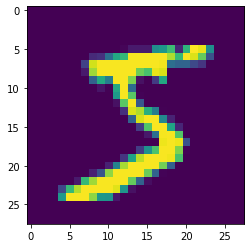

In [5]:
plt.imshow(X[0].reshape(28,28))


In [6]:
print("La premiere image est un : {}".format(y[0]))

La premiere image est un : 5


In [7]:
print("Type du 1er label : {}".format(type(y[0])))

Type du 1er label : <class 'str'>


Nos valeurs sont donc des Strings

In [8]:
print("Casting des valeurs en Int :")
y=y.astype(int)
print("Type du 1er label : {}".format(type(y[0])))

Casting des valeurs en Int :
Type du 1er label : <class 'numpy.int32'>


## Repartition des données :

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=1/7,shuffle=False)
print("Il y a bien {} valeurs dans notre base d'apprentissage".format(x_train.shape[0]))


Il y a bien 60000 valeurs dans notre base d'apprentissage


# Apprentissage d'un classificateur binaire
## Apprentissage des données

In [10]:
y_train_5=y_train==5
y_test_5=y_test==5



Utilisation du SGDClassifier



In [11]:
clf=SGDClassifier()
clf.fit(x_train,y_train_5)
y_pred=clf.predict(x_test)


In [12]:
y_pred[0]

False

In [13]:
regScore=cross_val_score(clf,x_train,y_train_5,cv=3,scoring='accuracy')
print("Valeur de l'accuracy pour chaque fold :\n")
for i in range(len(regScore)):
    print("Accuracy fold {} = {}".format(i+1,regScore[i]))

print("\nValeur moyenne de l'accuracy :")
print(regScore.mean())

Valeur de l'accuracy pour chaque fold :

Accuracy fold 1 = 0.9499
Accuracy fold 2 = 0.96455
Accuracy fold 3 = 0.9672

Valeur moyenne de l'accuracy :
0.96055


In [14]:
class Never5Classifier(BaseEstimator):

    def __init__(self):
        super().__init__()

    def fit(self,data,labels):
        pass
    def predict(self,data):
        return np.zeros((data.shape[0],),dtype=bool)

In [15]:
classifier=Never5Classifier()

regScore=cross_val_score(classifier,x_train,y_train_5,cv=3,scoring='accuracy')
print("Valeur de l'accuracy pour chaque fold :\n")
for i in range(len(regScore)):
    print("Accuracy fold {} = {}".format(i+1,regScore[i]))

print("\nValeur moyenne de l'accuracy :")
print(regScore.mean())

Valeur de l'accuracy pour chaque fold :

Accuracy fold 1 = 0.91125
Accuracy fold 2 = 0.90855
Accuracy fold 3 = 0.90915

Valeur moyenne de l'accuracy :
0.90965


In [16]:
classifier.predict(x_train)

array([False, False, False, ..., False, False, False])

En definissant ce classifier qui renvoie tout le temps faux, on constate une accuracy de 90%
On ne peut donc pas donner de crédit a cette valeur.

## Matrice de confusion

In [17]:
clf=SGDClassifier()
y_pred = cross_val_predict(clf,x_train,y_train_5,cv=3)


### Matrice de confusion

In [18]:
confusionMatrix=confusion_matrix(y_train_5,y_pred)
TN, FP, FN, TP = confusionMatrix.ravel()

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))
print("Score F1 : {}".format(f1_score(y_train_5,y_pred)))

Classification accuracy : 0.9429
Classification error : 0.0571
Precision : 0.6636
Recall or Sensitivity : 0.7464
Specificity : 0.9624
Score F1 : 0.7025525264802917


In [19]:
y_pred = cross_val_predict(clf,x_train,y_train_5,cv=3,method="decision_function")

Text(0, 0.5, 'précisions')

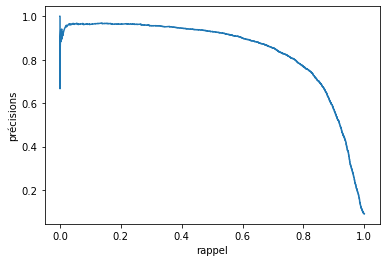

In [20]:
precision, recall,thresholds=precision_recall_curve(y_train_5,y_pred)
plt.plot(recall,precision)
plt.xlabel("rappel")
plt.ylabel("précisions")

Interpretation :
Jusqu'a un certain stade, le rappel ne modifie pas la précision. A partir d'un valeur de rappel de 0.6, on constate une grosse influence de ce dernier sur la precision
## Courbe ROC

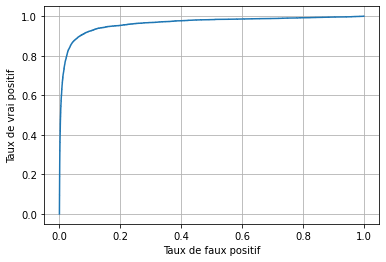

In [21]:
tfp, tvp, thresholds = roc_curve(y_train_5, y_pred)
plt.plot(tfp,tvp)
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrai positif")
plt.grid()

In [22]:
aire=roc_auc_score(y_train_5,y_pred)
print("L'aire est de {}".format(aire))

L'aire est de 0.9640922704884771


# Apprentissage d'un classifieur multi-classes
## Apprentissage des données

In [23]:
clf=SGDClassifier()
clf.fit(x_train,y_train)

SGDClassifier()

In [24]:
print('Pour la valeur notre modele trouve :')
print(clf.predict(x_test)[0])
print("Il aurait du trouver :")
y_test[0]

Pour la valeur notre modele trouve :
7
Il aurait du trouver :


7

In [25]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

On retrouve bien ici nos 10 classes 

## Evaluation du moèle d'apprentissage

In [26]:
regScore=cross_val_score(clf,x_train,y_train,cv=3,scoring='accuracy')
print("Valeur de l'accuracy pour chaque fold :\n")
for i in range(len(regScore)):
    print("Accuracy fold {} = {}".format(i+1,regScore[i]))

print("\nValeur moyenne de l'accuracy :")
print(regScore.mean())

Valeur de l'accuracy pour chaque fold :

Accuracy fold 1 = 0.8847
Accuracy fold 2 = 0.84505
Accuracy fold 3 = 0.86205

Valeur moyenne de l'accuracy :
0.8639333333333333


Scaling du jeu d'entrainement :

In [27]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)

In [28]:
regScore=cross_val_score(clf,x_train_scaled,y_train,cv=3,scoring='accuracy')
print("Valeur de l'accuracy pour chaque fold :\n")
for i in range(len(regScore)):
    print("Accuracy fold {} = {}".format(i+1,regScore[i]))

print("\nValeur moyenne de l'accuracy :")
print(regScore.mean())

Valeur de l'accuracy pour chaque fold :

Accuracy fold 1 = 0.90205
Accuracy fold 2 = 0.89865
Accuracy fold 3 = 0.898

Valeur moyenne de l'accuracy :
0.8995666666666667


In [29]:
y_pred = cross_val_predict(clf,x_train,y_train_5,cv=3)

In [30]:
confusionMatrix=confusion_matrix(y_train,y_pred)
confusionMatrix.ravel()



array([5807,  116,    0,    0,    0,    0,    0,    0,    0,    0, 6713,
         29,    0,    0,    0,    0,    0,    0,    0,    0, 5917,   41,
          0,    0,    0,    0,    0,    0,    0,    0, 5993,  138,    0,
          0,    0,    0,    0,    0,    0,    0, 5772,   70,    0,    0,
          0,    0,    0,    0,    0,    0, 1417, 4004,    0,    0,    0,
          0,    0,    0,    0,    0, 5710,  208,    0,    0,    0,    0,
          0,    0,    0,    0, 6251,   14,    0,    0,    0,    0,    0,
          0,    0,    0, 5676,  175,    0,    0,    0,    0,    0,    0,
          0,    0, 5893,   56,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int64)

In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np



targets_names = [0,1,2,3,4,5,6,7,8,9]


images_train = x_train.astype('float')/255
images_test = x_test.astype('float')/255


In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [35]:
history = model.fit(images_train,
                    y_train,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3915 - accuracy: 0.8846 - val_loss: 0.1171 - val_accuracy: 0.9647
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0954 - accuracy: 0.9704 - val_loss: 0.1091 - val_accuracy: 0.9677
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9800 - val_loss: 0.0925 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0946 - val_accuracy: 0.9748
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0347 - accuracy: 0.9879 - val_loss: 0.1037 - val_accuracy: 0.9715
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.9914 - val_loss: 0.0954 - val_accuracy: 0.9758
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0980 - val_accuracy:

In [36]:
loss, acc = model.evaluate(images_test, y_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9805
Test Loss 0.08164186775684357
Test Accuracy 0.9804999828338623


In [37]:
model.predict_classes(images_train)[0]

5

In [69]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(tf.keras.layers.Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256, 
                 kernel_size=(3, 3), 
                 activation='relu'))

model.add(tf.keras.layers.Conv2D(256, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [70]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 256)       147712    
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)        

In [59]:
images_train = images_train.reshape(-1,28,28,1)
images_test = images_test.reshape(-1,28,28,1)

In [71]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)